In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# read the csv's

df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

# concate both frames
df_main = pd.concat( [df_train,df_test], axis=0)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [208]:
#Drop cabin
df_main.drop(["Cabin"], axis=1, inplace=True)

#Fill the nulls with grouped medians
df_main.Age.fillna(df_main.groupby(['Sex','Pclass']).transform('median').Age.iloc[:df_main.shape[0]], inplace=True)
df_main.Fare.fillna(df_main.groupby(['Sex','Pclass']).transform('median').Fare.iloc[:df_main.shape[0]], inplace=True)

# Add new field called title and use it as a new feature
df_main["Title"] = [name.split(",")[1].split(" ")[1] for name in df_main.Name]
bins = [0,5,14,19,25,30,40,65,100]
labels = ['baby','kid','teen','Adult','Parent',"Old-Parent","Grand-parent","nearly-dead"]
df_main['AgeGroup'] = pd.cut(df_main['Age'], bins=bins, labels=labels,right=False)

bins = [0,10,20,40,80,160,320,1280,10000]
labels = ['low-low','low-normal','low-expensive','normal-low','normal-normal',"normal-expensive","expensive","richkid"]
df_main['FareGroup'] = pd.cut(df_main['Fare'], bins=bins, labels=labels,right=False)



In [209]:
main = df_main


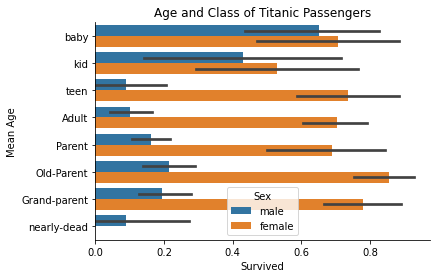

In [210]:
# Shows that there is a huge positive correlation between sex and the surviving
sns.barplot(data=main, x="Survived", y="AgeGroup", hue="Sex")
plt.title('Age and Class of Titanic Passengers')
plt.xlabel('Survived')
plt.ylabel('Mean Age')
sns.despine()
plt.show()

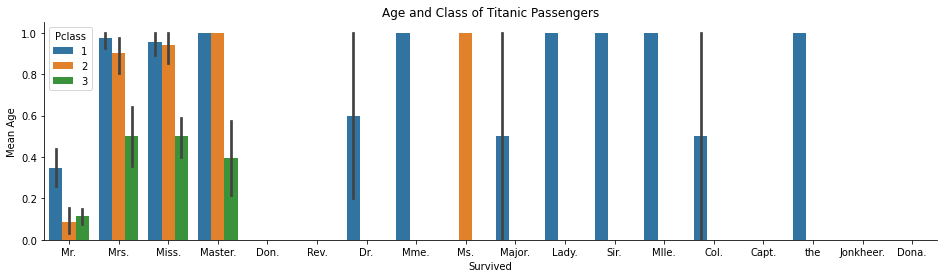

In [211]:
# We can see that there exist some titles which will survive depending on the priceclass
# 
plt.figure(figsize=(16,4))
sns.barplot(data=main, x="Title", y="Survived", hue="Pclass")
plt.title('Age and Class of Titanic Passengers')
plt.xlabel('Survived')
plt.ylabel('Mean Age')
sns.despine()
plt.show()

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [236]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#create dummy data for the features
full = pd.get_dummies(main[["AgeGroup","Title","Pclass","Sex","Embarked","Parch","SibSp","FareGroup"]])
#Splitting the datasets
train_df = full.iloc[0:890]
test_df = full.iloc[891:]
# train dataset
y_train = main.Survived.iloc[0:890]
X_train, X_test, Y_train, Y_test = train_test_split(train_df, y_train, test_size=0.35, random_state=21)


rfc_model = RandomForestClassifier(n_estimators=102, criterion="entropy", min_samples_leaf=3,random_state=42)
rfc_model.fit(X_train,Y_train)
y_pred = rfc_model.predict(X_test)
print("Training Accuracy:", rfc_model.score(X_test,Y_test))
print("RFC-Classifier", classification_report(Y_test, y_pred))

In [238]:
#Modeling

# RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=60, criterion="entropy", min_samples_leaf=2,random_state=42)
rfc_model.fit(X_train,Y_train)
y_pred = rfc_model.predict(X_test)
print("Training Accuracy:", rfc_model.score(X_test,Y_test))
print("RFC", classification_report(Y_test, y_pred))

# DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(criterion="entropy", splitter="best",min_samples_leaf=5)
dtc_model.fit(X_train,Y_train)
y_pred2 = dtc_model.predict(X_test)
print("Training Accuracy:", dtc_model.score(X_test,Y_test))
print("DCT", classification_report(Y_test, y_pred2))

# SVC
svc_model = SVC(kernel="linear", degree=4, gamma="auto",random_state=42)
svc_model.fit(X_train,Y_train)
y_pred3 = svc_model.predict(X_test)
print("Training Accuracy:", svc_model.score(X_test,Y_test))
print("SVC", classification_report(Y_test, y_pred3))


knn_model = KNeighborsClassifier(n_neighbors=12,algorithm="auto", p=2)
knn_model.fit(X_train,Y_train)
y_pred4 = knn_model.predict(X_test)
print("Training Accuracy:", knn_model.score(X_test,Y_test))
print("KNN", classification_report(Y_test, y_pred4))

gbc_model = GradientBoostingClassifier(n_estimators=1500, learning_rate=0.01,max_depth=4, verbose=0, random_state=42)
gbc_model.fit(X_train,Y_train)
y_pred5 = knn_model.predict(X_test)
print("Training Accuracy:", gbc_model.score(X_test,Y_test))
print("gbc", classification_report(Y_test, y_pred5))



Training Accuracy: 0.8269230769230769
RFC               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       189
         1.0       0.83      0.71      0.76       123

    accuracy                           0.83       312
   macro avg       0.83      0.81      0.81       312
weighted avg       0.83      0.83      0.82       312

Training Accuracy: 0.8301282051282052
DCT               precision    recall  f1-score   support

         0.0       0.80      0.95      0.87       189
         1.0       0.90      0.64      0.75       123

    accuracy                           0.83       312
   macro avg       0.85      0.80      0.81       312
weighted avg       0.84      0.83      0.82       312

Training Accuracy: 0.8205128205128205
SVC               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       189
         1.0       0.80      0.72      0.76       123

    accuracy                           0.82       312
  

In [215]:
# Creating submit data set
test_df.head()


,Pclass,Parch,SibSp,AgeGroup_baby,AgeGroup_kid,AgeGroup_teen,AgeGroup_Adult,AgeGroup_Parent,AgeGroup_Old-Parent,AgeGroup_Grand-parent,...,Embarked_Q,Embarked_S,FareGroup_low-low,FareGroup_low-normal,FareGroup_low-expensive,FareGroup_normal-low,FareGroup_normal-normal,FareGroup_normal-expensive,FareGroup_expensive,FareGroup_richkid
0,3,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,3,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,3,1,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [239]:
pred = dtc_model.predict(test_df)
submit=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':pred})
submit.Survived = submit["Survived"].astype(int)
submit.to_csv('./submission.csv',index=False)